In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [7]:
df=pd.read_csv("D:\\Kartik DataScience\Python\Assignment 9\\book.csv")

In [8]:
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [9]:
df.shape

(2000, 11)

In [10]:
df.ChildBks.unique()

array([0, 1], dtype=int64)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [12]:
df.value_counts()

ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  ItalCook  ItalAtlas  ItalArt  Florence
0         0         0        0         0       0       0        0         0          0        0           421
1         0         0        0         0       0       0        0         0          0        0           136
0         0         1        0         0       0       0        0         0          0        0           133
                    0        1         0       0       0        0         0          0        0            67
                             0         0       0       0        0         0          0        1            58
                                                                                                         ... 
1         0         1        1         1       1       0        0         1          1        1             1
0         0         1        1         1       1       1        0         0          0        0             1
1         0      

In [13]:
df.value_counts

<bound method DataFrame.value_counts of       ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  \
0            0         1        0         1       0       0        1   
1            1         0        0         0       0       0        0   
2            0         0        0         0       0       0        0   
3            1         1        1         0       1       0        1   
4            0         0        1         0       0       0        1   
...        ...       ...      ...       ...     ...     ...      ...   
1995         0         0        1         0       0       1        1   
1996         0         0        0         0       0       0        0   
1997         0         0        0         0       0       0        0   
1998         0         0        1         0       0       0        0   
1999         0         0        0         0       0       0        0   

      ItalCook  ItalAtlas  ItalArt  Florence  
0            0          0        0         0  
1

In [14]:
pip install mlxtend 

In [15]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [16]:
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [17]:
def generate_rules(df, min_support, min_confidence):
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
    return rules

In [18]:
def visualize_rules(rules, plot_type='scatter'):
    if plot_type == 'scatter':
        plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
        plt.xlabel('Support')
        plt.ylabel('Confidence')
        plt.title('Support vs Confidence')
    elif plot_type == 'hist':
        plt.hist(rules['support'], bins=20, alpha=0.5)
        plt.xlabel('Support')
        plt.ylabel('Frequency')
        plt.title('Distribution of Support')
    elif plot_type == 'box':
        plt.boxplot(rules['confidence'])
        plt.ylabel('Confidence')
        plt.title('Boxplot of Confidence')
    else:
        print("Invalid plot type. Please choose from 'scatter', 'hist', or 'box'.")

In [19]:
support_values = [0.1, 0.2, 0.3]
confidence_values = [0.5, 0.6, 0.7]

In [20]:
import warnings
warnings.filterwarnings('ignore')

Support: 0.1, Confidence: 0.5, Number of Rules: 49


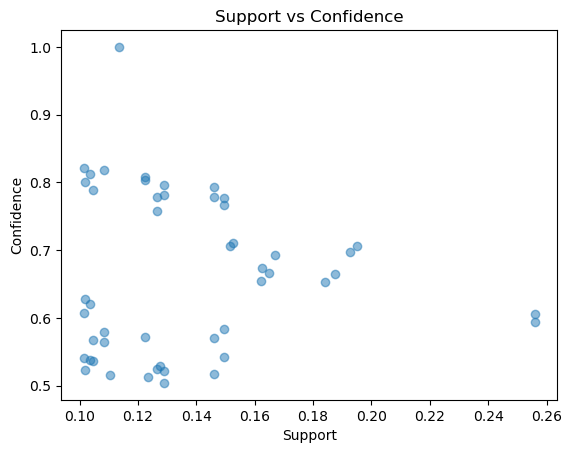

Support: 0.1, Confidence: 0.6, Number of Rules: 30


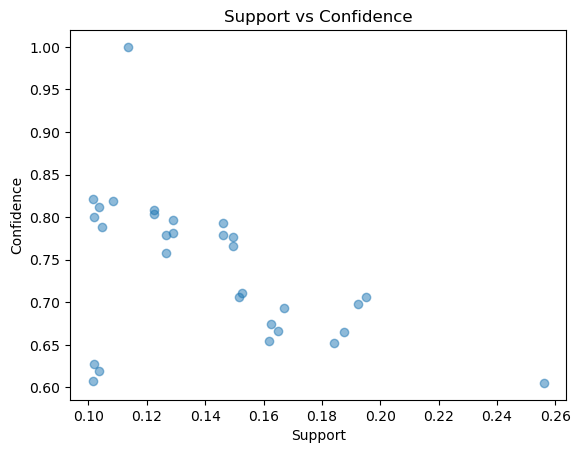

Support: 0.1, Confidence: 0.7, Number of Rules: 19


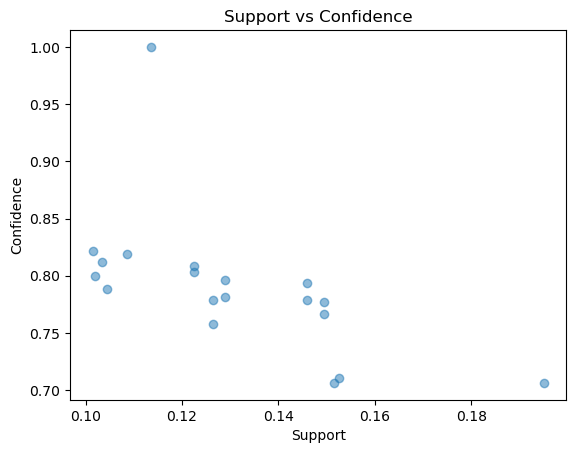

Support: 0.2, Confidence: 0.5, Number of Rules: 2


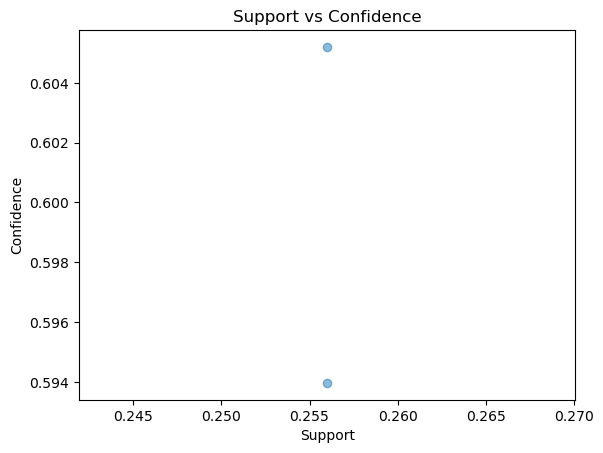

Support: 0.2, Confidence: 0.6, Number of Rules: 1


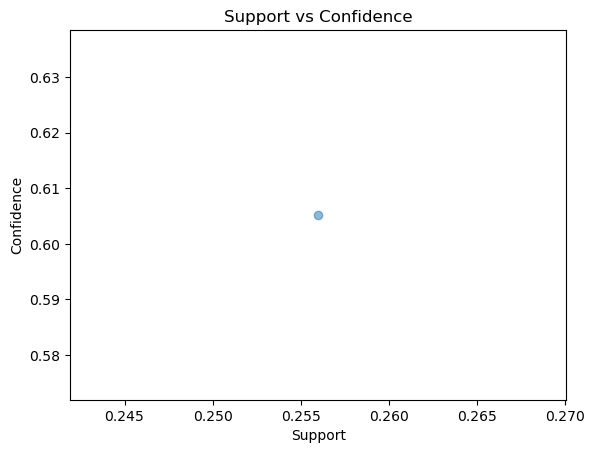

Support: 0.2, Confidence: 0.7, Number of Rules: 0


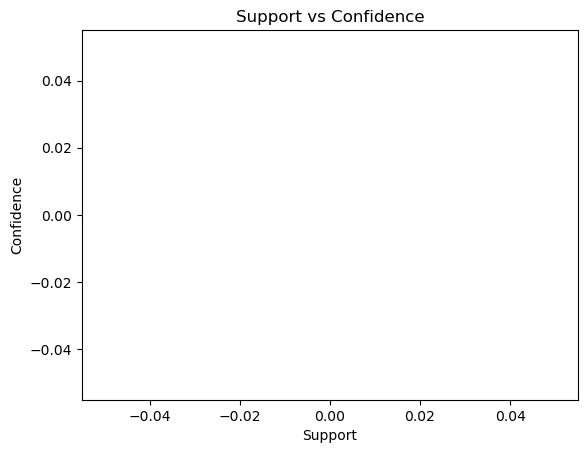

Support: 0.3, Confidence: 0.5, Number of Rules: 0


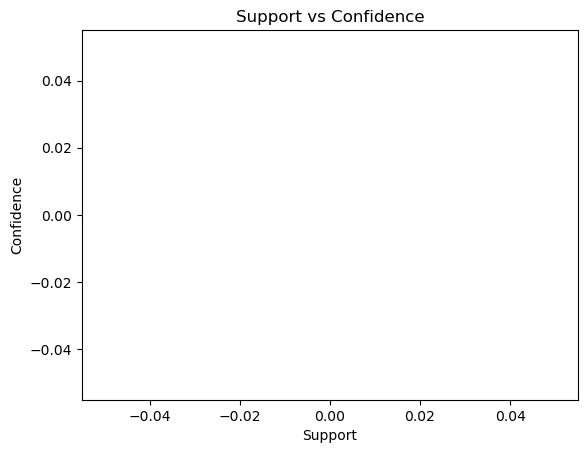

Support: 0.3, Confidence: 0.6, Number of Rules: 0


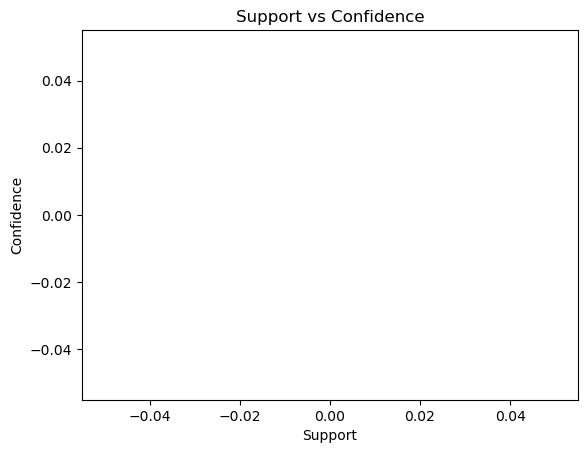

Support: 0.3, Confidence: 0.7, Number of Rules: 0


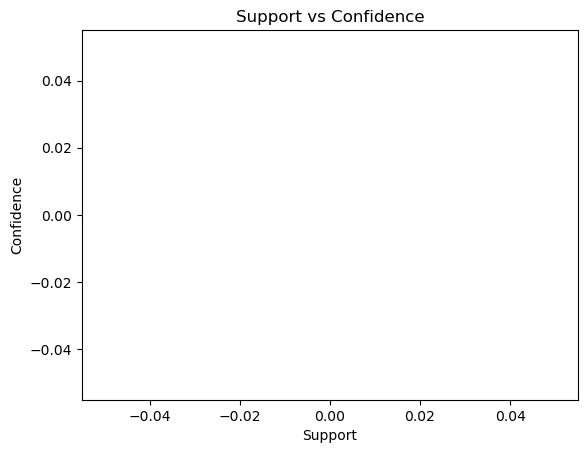

In [29]:
for support in support_values:
    for confidence in confidence_values:
        rules = generate_rules(df, support, confidence)
        print(f"Support: {support}, Confidence: {confidence}, Number of Rules: {len(rules)}")
        visualize_rules(rules, plot_type='scatter')
        plt.show()

In [22]:
min_lengths = [2, 3, 4]
for min_length in min_lengths:
    rules = generate_rules(df, min_support=0.1, min_confidence=0.5)
    print(f"Minimum Length: {min_length}, Number of Rules: {len(rules)}")

Minimum Length: 2, Number of Rules: 49
Minimum Length: 3, Number of Rules: 49
Minimum Length: 4, Number of Rules: 49


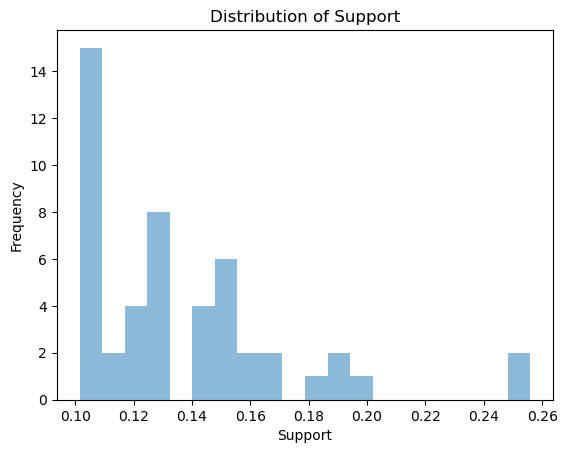

In [23]:
visualize_rules(rules, plot_type='hist')
plt.show()